<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/DL_Projects_Codes/custom_neural_network_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**custom neural network**

In [204]:
# libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

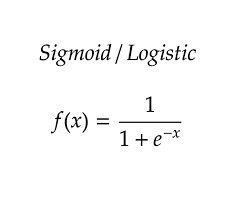

In [205]:
# sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [208]:
sigmoid(np.array([18,0,1,33]))

array([0.99999998, 0.5       , 0.73105858, 1.        ])

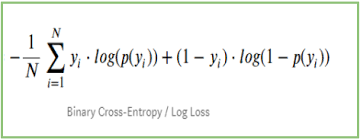

In [243]:
# log loss function
def log_loss(true,pred):
  # constant epsilon
  epsilon = 1e-15

  labels = [max(i,epsilon) for i in pred]
  labels = [min(i,1-epsilon) for i in labels]
  labels = np.asarray(labels)
  return -np.mean((true * np.log(labels)) + (1 - np.array(true)) * np.log(1 - labels))

In [244]:
log_loss(np.array([1,0,1,0,1]),np.array([1,0,1,0,1]))

np.float64(9.992007221626415e-16)

In [261]:
# gradient descent
def gradient_descent(marks,validity,y_true,epochs=1000):

  # initializing weights and bias
  w1 = w2 = 1
  b = 0
  rate = 0.5 # learning rate
  n = len(marks)

  # looping through using epochs
  for i in range(epochs):
    z = w1 * marks + w2 * validity + b
    pred = sigmoid(z)

    # loss function
    loss = log_loss(y_true,pred)

    # derivatives of weights and bias
    w1d = 1/n*(np.dot(np.transpose(marks),(pred - y_true)))
    w2d = 1/n*(np.dot(np.transpose(validity),(pred - y_true)))
    bd = np.mean(pred - y_true)

    # adjust weights and bias with derivatives and learning rate
    w1 = w1 - rate * w1d
    w2 = w2 - rate * w2d
    b = b - rate * bd

    if i%100 == 0:
      print(f'Epochs : {i+1} / {epochs} ------------------------------------->')
      print(f'w1 : {w1} | w2 : {w2} | bias : {b} | loss : {loss}')
      # return w1,w2,b,loss

    if loss <= 0.350:
      return i,w1,w2,b,loss




In [228]:
# data collection

students = pd.read_csv('/content/students_marks_dataset.csv')
students.sample(3)

,marks,validity,final
15,79,1,1
38,47,1,0
17,85,1,1


In [229]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(students[['marks','validity']],students['final'],test_size=0.2,random_state=3)

In [230]:
print(x_train.shape,x_test.shape," | ",y_train.shape,y_test.shape)

(40, 2) (10, 2)  |  (40,) (10,)


In [262]:
gradient_descent(x_train['marks'],x_train['validity'],y_train,epochs=1000)

Epochs : 1 / 1000 ------------------------------------->
w1 : -4.524999999800845 | w2 : 0.9125 | bias : -0.14999999999051797 | loss : 9.694415341881768
Epochs : 101 / 1000 ------------------------------------->
w1 : 23.45298104856152 | w2 : 0.04093381186615919 | bias : -6.137186512170942 | loss : 24.17714347643748
Epochs : 201 / 1000 ------------------------------------->
w1 : 19.079825449074704 | w2 : -1.27148741734562 | bias : -12.623292339172059 | loss : 10.361872797702265
Epochs : 301 / 1000 ------------------------------------->
w1 : 14.806607920901376 | w2 : -2.583980547483872 | bias : -19.10423033715247 | loss : 10.361872797702265
Epochs : 401 / 1000 ------------------------------------->
w1 : 18.319384923736386 | w2 : -3.7361473998494366 | bias : -25.312129945077338 | loss : 10.361872797702265


(422,
 np.float64(1.0288950937773362),
 np.float64(-4.241052148019312),
 np.float64(-26.899790927995618),
 np.float64(0.022417767969386618))

In [263]:
'''
at 422th epoch
w1 - 1.0288950937773362
w2 - -4.241052148019312
b - -26.899790927995618
loss - 0.022417767969386618
'''

def predict(marks,validity):
  w1 = 1.0288950937773362
  w2 = -4.241052148019312
  b  = -26.899790927995618
  z = w1 * marks + w2 * validity + b
  return sigmoid(z)

predict(85,1)

np.float64(1.0)

In [264]:
predict(47,1)

np.float64(0.999999966683943)

In [265]:
predict(47,0)

np.float64(0.9999999995205007)

In [266]:
predict(25,0)

np.float64(0.23551755943278313)